In [1]:
import gym
import matplotlib.pyplot as plt

from lux_entry.heuristics import bidding, factory_placement
from lux_entry.wrappers.controllers import ControllerWrapper
from lux_entry.wrappers.observations import ObservationWrapper
from lux_entry.wrappers.skip_phases import MainGameOnlyWrapper

/Users/matt/Library/Caches/pypoetry/virtualenvs/lux-entry-8q9Sg5Ol-py3.9/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
env = gym.make("LuxAI_S2-v0")
env = MainGameOnlyWrapper(
    env,
    bid_policy=bidding.zero_bid,
    factory_placement_policy=factory_placement.place_near_random_ice,
    controller=ControllerWrapper(env.env_cfg),
)
env = ObservationWrapper(env)
obs = env.reset();

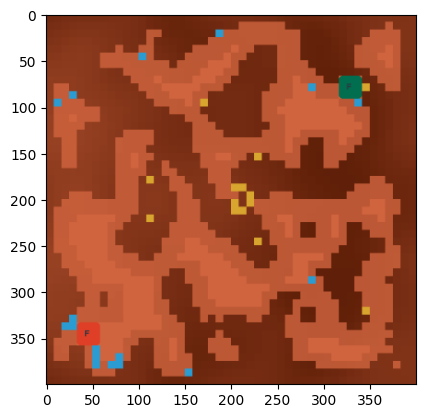

In [4]:
img = env.render("rgb_array")
plt.imshow(img)

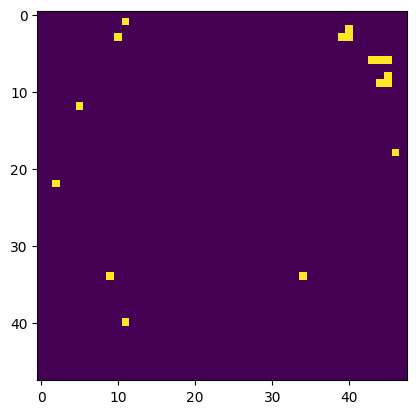

In [7]:
plt.imshow(obs.tile_has_ice)